In [16]:
import cv2 as cv
import numpy as np
import sys
from util_func import *
assert sys.version_info >= (3, 7)

# Learning outcomes
1. image histogram: distribution grayscale values
2. Enhance constrast: scalar multiplication on image, histogram equalization and its variant called CLAHE.
3. Thresholding: global thresholding and otsu thresholding
4. Morphological operations (limit our discussion on binary image)
5. Color spaces: HSV color space

## Image histogram

In [3]:
img = cv.imread("images/lena.jfif")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

### Two ways to compute historgram

In [6]:
# 1st way
%timeit hist = cv.calcHist([gray],[0], None, [256], [0,256])
%timeit hist, _ = np.histogram(gray.flatten(), 256)

36.5 µs ± 154 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.12 ms ± 6.57 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


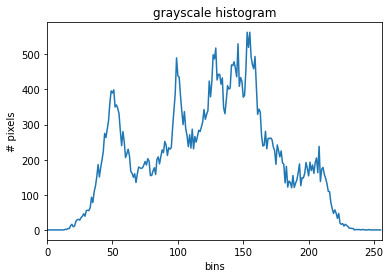

In [8]:
hist = cv.calcHist([gray], [0], None, [256], [0,256])

plt.figure()
plt.title("grayscale histogram")
plt.xlabel("bins")
plt.ylabel("# pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()


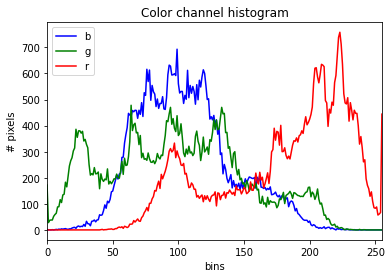

In [9]:
# get the histogram for every channel
channels = cv.split(img)
colors = ("b","g","r")

plt.figure()
plt.title("Color channel histogram")
plt.xlabel("bins")
plt.ylabel("# pixels")

for ch, color in zip(channels, colors):
    hist = cv.calcHist([ch], [0], None, [256], [0,256])
    plt.plot(hist, color=color, label=color)
    
plt.xlim([0,255])
plt.legend()
plt.show()


In [10]:
img = cv.imread("images/low_contrast_img.jfif", 0)
show_img("Low contrast", img)

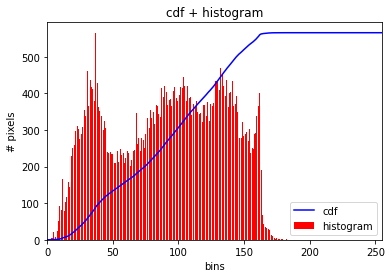

In [13]:
# histogram for this image
hist = cv.calcHist([img], [0], None, [256], [0,256])

#CDF
cdf = hist.cumsum()
cdf_norm = cdf * hist.max() / cdf.max()

plt.figure()
plt.plot(cdf_norm, color="b")
plt.hist(img.flatten(), 256, color="r")
plt.title("cdf + histogram")
plt.xlabel("bins")
plt.ylabel("# pixels")
plt.legend(("cdf", "histogram"))
plt.xlim([0, 255])
plt.show()

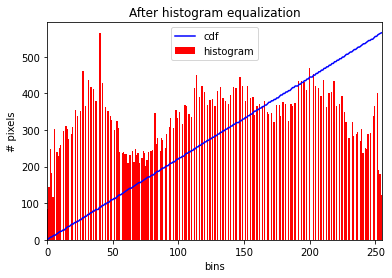

In [14]:
# histogram equalization
eq = cv.equalizeHist(img)

# histogram for this image
hist = cv.calcHist([eq], [0], None, [256], [0,256])

#CDF
cdf = hist.cumsum()
cdf_norm = cdf * hist.max() / cdf.max()

plt.figure()
plt.plot(cdf_norm, color="b")
plt.hist(eq.flatten(), 256, color="r")
plt.title("After histogram equalization")
plt.xlabel("bins")
plt.ylabel("# pixels")
plt.legend(("cdf", "histogram"))
plt.xlim([0, 255])
plt.show()

In [2]:
# CLAHE
img = cv.imread("images/dog1.jfif", 0)

#equalization
eq = cv.equalizeHist(img)

#CLAHE
clahe = cv.createCLAHE(clipLimit=3, tileGridSize=(8,8))
dst = clahe.apply(img)

cv.imshow("original", img)
cv.imshow("equalization", eq)
show_img("CLAHE", dst)

In [3]:
# CLAHE
img = cv.imread("images/winter.jfif", 0)

#equalization
eq = cv.equalizeHist(img)

#CLAHE
clahe = cv.createCLAHE(clipLimit=3, tileGridSize=(8,8))
dst = clahe.apply(img)

cv.imshow("original", img)
cv.imshow("equalization", eq)
show_img("CLAHE", dst)

## Thresholding

In [4]:
#simple global thresholding
#different types of thresholding
[i for i in dir(cv) if i.startswith("THRESH")]

['THRESH_BINARY',
 'THRESH_BINARY_INV',
 'THRESH_MASK',
 'THRESH_OTSU',
 'THRESH_TOZERO',
 'THRESH_TOZERO_INV',
 'THRESH_TRIANGLE',
 'THRESH_TRUNC']

In [7]:
img = np.fromfunction(lambda i, j: j, (50, 256), dtype=np.uint8)

def trackbar(x):
    _, img1 = cv.threshold(img, x, 255, cv.THRESH_BINARY)
    _, img2 = cv.threshold(img, x, 255, cv.THRESH_BINARY_INV)
    _, img3 = cv.threshold(img, x, 255, cv.THRESH_TRUNC)        
    _, img4 = cv.threshold(img, x, 255, cv.THRESH_TOZERO)        
    _, img5 = cv.threshold(img, x, 255, cv.THRESH_TOZERO_INV)  
    
    cv.imshow("window", np.vstack((img1, img2, img3, img4, img5)))
    
cv.namedWindow("window")
cv.createTrackbar("threshold", "window", 100, 255, trackbar)
cv.waitKey(0)
cv.destroyAllWindows()

## Simple global threshold v.s. Otsu thresholding

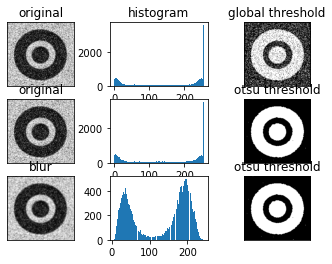

In [6]:
# 3 approaches: global threshold, otsu threshold, blurring + otsu threshold
img = cv.imread("images/noisy.jfif", 0)

#1:
th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)[1]

#2:
th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]

#3:
blur = cv.GaussianBlur(img, (5,5), 0)
th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]

imgs = [img, 0, th1,
       img, 0, th3,
       blur, 0, th3]

titles = ("original", "histogram", "global threshold",
          "original", "", "otsu threshold",
          "blur", "", "otsu threshold")

for i in range(3):
    plt.subplot(3, 3, 3 * i + 1), plt_img(imgs[3*i], title=titles[3*i])
    plt.subplot(3, 3, 3 * i + 2), plt.hist(imgs[3*i].flatten(), 256),
    plt.title(titles[3*i+1])
    plt.subplot(3, 3, 3 * i + 3), plt_img(imgs[3*i+2], title=titles[3*i+2])
    
plt.show()

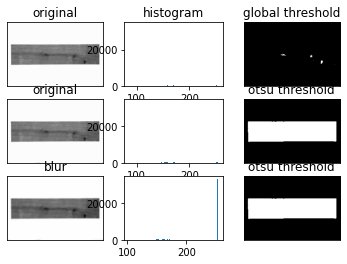

In [4]:
# 3 approaches: global threshold, otsu threshold, blurring + otsu threshold
img = cv.imread("images/wood_planck.jfif", 0)

#1:
th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)[1]

#2:
th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]

#3:
blur = cv.GaussianBlur(img, (5,5), 0)
th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]

imgs = [img, 0, th1,
       img, 0, th3,
       blur, 0, th3]

titles = ("original", "histogram", "global threshold",
          "original", "", "otsu threshold",
          "blur", "", "otsu threshold")

for i in range(3):
    plt.subplot(3, 3, 3 * i + 1), plt_img(imgs[3*i], title=titles[3*i])
    plt.subplot(3, 3, 3 * i + 2), plt.hist(imgs[3*i].flatten(), 256),
    plt.title(titles[3*i+1])
    plt.subplot(3, 3, 3 * i + 3), plt_img(imgs[3*i+2], title=titles[3*i+2])
    
plt.show()

## Morphological operations

In [24]:
# kernel
kernel = np.ones((3,3), np.uint8)

#erosions
erosion = cv.erode(th3, kernel, iterations=1)

#combined
img_combined = np.hstack((th3, erosion))

show_img("Erosion", img_combined)

In [15]:
# trackbar: function and while loop
def nothing(x):
    pass

wn = "window"
cv.namedWindow(wn)
cv.createTrackbar("size", wn, 3, 10, nothing)
cv.createTrackbar("iter", wn, 3, 10, nothing)

while(1):
    # retrieve the size and iteration
    size = cv.getTrackbarPos("size", wn)
    if size < 3:
        size = 3
    
    iteration = cv.getTrackbarPos("iter", wn)
    if iteration < 1:
        iteration = 1
        
    kernel = np.ones((size, size), dtype=np.uint8)
    # closing
    closing = cv.morphologyEx(th3, cv.MORPH_OPEN, kernel, iterations=iteration)
    
    cv.imshow(wn, closing)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
        
cv.destroyAllWindows()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2581: error: (-27:Null pointer) NULL window: 'window' in function 'cvGetTrackbarPos'


In [8]:
cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

## Color spaces
 - RGB / BGR (prevalent image formats)
 - HSV (hue, saturation, value)
     * hue encodes color (angular, 0-359). In OpenCV, 0-179
     * saturation implies color purity
     * value: brightness. 0 is dark 
 - L\*a\*b:
     - L denotes brightness / luminance while a and b are color channels.
     - percentual uniformity

In [27]:
# sharpen 
img = cv.imread("images/lena.jfif")

img_lab = cv.cvtColor(img, cv.COLOR_BGR2Lab)

l, a, b = cv.split(img_lab)

# process just the L channel
# sharpen
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
l_sharpen = cv.filter2D(1, -1, kernel)

# merge
sharpen = cv.merge((l_sharpen, a, b))

# change to bgr
sharpen = cv.cvtColor(sharpen, cv.COLOR_Lab2BGR)

cv.imshow("original", img)
show_img("sharpen", sharpen)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\merge.dispatch.cpp:129: error: (-215:Assertion failed) mv[i].size == mv[0].size && mv[i].depth() == depth in function 'cv::merge'


## Demo on color based segmentation

In [96]:
img = cv.imread("images/color_space/pant5.jfif")

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

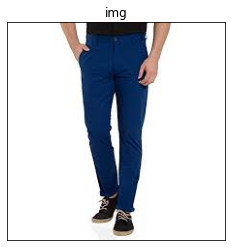

In [97]:
plt_img(img, "img")

In [98]:
## import dependecies
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

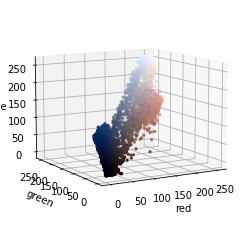

In [99]:
# split the image into separate channels
r, g, b = cv.split(img)
#set up 3d figure
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = img.reshape((-1,3))
norm = colors.Normalize()
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.ravel(), g.ravel(), b.ravel(),
             facecolors = pixel_colors, marker=".")
axis.view_init(elev=10, azim=240)
axis.set_xlabel("red")
axis.set_ylabel("green")
axis.set_zlabel("blue")
plt.show()

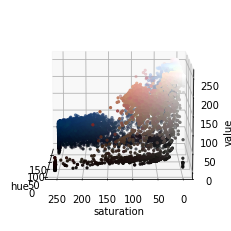

In [100]:
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

h, s, v = cv.split(img_hsv)
#set up 3d figure
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.ravel(), s.ravel(), v.ravel(),
             facecolors = pixel_colors, marker=".")
axis.view_init(elev=10, azim=180)
axis.set_xlabel("hue")
axis.set_ylabel("saturation")
axis.set_zlabel("value")
plt.show()


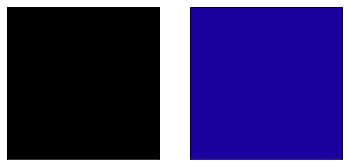

In [101]:
blue_low = (85, 90, 0)
blue_high = (125, 255, 160)

square1 = np.full((10, 10, 3), blue_low, dtype=np.uint8)
square2 = np.full((10, 10, 3), blue_high, dtype=np.uint8)

plt.subplot(121), plt_img(cv.cvtColor(square1, cv.COLOR_HSV2RGB))
plt.subplot(122), plt_img(cv.cvtColor(square2, cv.COLOR_HSV2RGB))
plt.show()

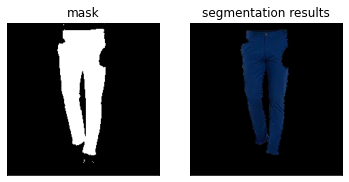

In [102]:
# color based segmentation
mask = cv.inRange(img_hsv, blue_low, blue_high)
res = cv.bitwise_and(img, img, mask=mask)
plt.subplot(121), plt_img(mask, title="mask")
plt.subplot(122), plt_img(res, title="segmentation results")
plt.show()

## Exercise

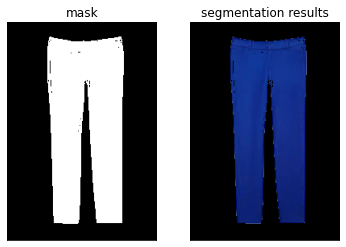

In [106]:
img = cv.imread("images/color_space/pant3.jfif")

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
blue_low = (85, 90, 0)
blue_high = (125, 255, 160)

mask = cv.inRange(img_hsv, blue_low, blue_high)
res = cv.bitwise_and(img, img, mask=mask)
plt.subplot(121), plt_img(mask, title="mask")
plt.subplot(122), plt_img(res, title="segmentation results")
plt.show()

## Exercise v2

In [107]:
def color_seg(img, color_low, color_high, smooth=True):
    """Args:
    img: source image (RGB)
    color_low and color_high are tuple of colors
    smooth is boolean (blurring or not)"""
    ori_img = img.copy()
    if smooth:
        img = cv.GaussianBlur(img, (5,5), 0)
        
    # change from RGB to HSV
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    
    # mask
    mask = cv.inRange(img_hsv, color_low, color_high)
    mask = cv.erode(mask, None, iterations=2)
    mask = cv.dilate(mask, None, iterations=2)
    
    return cv.bitwise_and(ori_img, ori_img, mask=mask)

imgs = []

for i in range(1, 6):
    img = cv.imread(cv.samples.findFile(f"images/color_space/pant{i}.jfif"))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    imgs.append(img)
    
# perform color segmentation
res = [color_seg(im, blue_low, blue_high) for im in imgs]


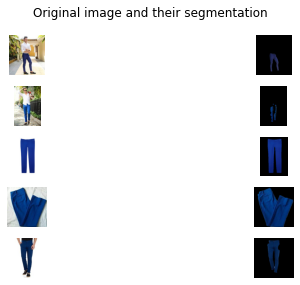

In [108]:
fig, ax = plt.subplots(5, 2, figsize=(10, 4))

for i in range(5):
    ax[i][0].imshow(imgs[i])
    ax[i][0].axis("off")
    ax[i][1].imshow(res[i])
    ax[i][1].axis("off")

fig.suptitle("Original image and their segmentation")
plt.tight_layout()
plt.show()

## Weekly activity

### Exercise 1

(292, 331)
(696, 456)


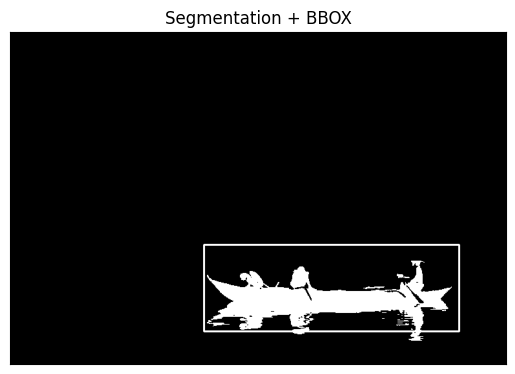

In [6]:
img = cv.imread("boat.jpg", 0)
th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]


def rect_region(event, x, y ,flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print((x,y))
        cv.circle(img, (x,y), 1, (0,0,255), -1)
        cv.imshow("img", img)

cv.imshow("img", img)
cv.setMouseCallback("img", rect_region)
cv.waitKey(0)
cv.destroyAllWindows()

bbox = cv.rectangle(th2, (300,329), (695,463), (255,255,255), 2)
plt_img(bbox, "Segmentation + BBOX")

### Exercise 2

In [2]:
# trackbar: function and while loop
def nothing(x):
    pass

img = cv.imread("leaf.jfif", 0)
th3 = cv.threshold(img, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]

wn = "window"
cv.namedWindow(wn)
cv.createTrackbar("size", wn, 3, 10, nothing)
cv.createTrackbar("iter", wn, 3, 10, nothing)

while(1):
    # retrieve the size and iteration
    size = cv.getTrackbarPos("size", wn)
    if size < 3:
        size = 3
    
    iteration = cv.getTrackbarPos("iter", wn)
    if iteration < 1:
        iteration = 1
        
    kernel = np.ones((size, size), dtype=np.uint8)
    # Erosion
    erosion = cv.erode(th3, kernel, iterations=iteration)
    # Dilation
    dilation = cv.dilate(th3, kernel, iterations=iteration)
    # Opening
    opening = cv.morphologyEx(th3, cv.MORPH_OPEN, kernel, iterations=iteration)
    # closing
    closing = cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel, iterations=iteration)
    
    res = np.hstack((erosion, dilation, opening, closing))
    cv.imshow(wn, res)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
        
cv.destroyAllWindows()

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2561: error: (-27:Null pointer) NULL window: 'window' in function 'cvGetTrackbarPos'


### Exercise 3

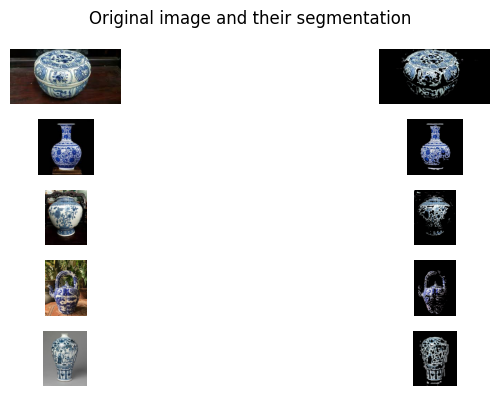

In [28]:
def color_seg(img, color_low1, color_high1, color_low2, color_high2, smooth=True):
    """Args:
    img: source image (RGB)
    color_low and color_high are tuple of colors
    smooth is boolean (blurring or not)"""
    ori_img = img.copy()
    if smooth:
        img = cv.GaussianBlur(img, (5,5), 0)
        
    # change from RGB to HSV
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    
    # mask white
    mask1 = cv.inRange(img_hsv, color_low1, color_high1)
    
    # mask blue
    mask2 = cv.inRange(img_hsv, color_low2, color_high2)
    
    mask=cv.bitwise_or(mask1, mask2)
    #mask = cv.erode(mask, None, iterations=2)
    #mask = cv.dilate(mask, None, iterations=2)
    
    return cv.bitwise_and(ori_img, ori_img, mask=mask)

white_low = (76, 0, 0)
white_high = (179, 41, 255)
blue_low = (67, 43, 132)
blue_high = (179, 255, 255)


imgs = []

for i in range(1, 6):
    img = cv.imread(cv.samples.findFile(f"color_space/porcelain{i}.jfif"))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    imgs.append(img)
    
# perform color segmentation
res = [color_seg(im, white_low, white_high, blue_low, blue_high) for im in imgs]

fig, ax = plt.subplots(5, 2, figsize=(10, 4))

for i in range(5):
    ax[i][0].imshow(imgs[i])
    ax[i][0].axis("off")
    ax[i][1].imshow(res[i])
    ax[i][1].axis("off")

fig.suptitle("Original image and their segmentation")
plt.tight_layout()
plt.show()


In [26]:
import cv2
import numpy as np
import PIL
from PIL import Image

list_im = ['color_space/porcelain1.jfif', 'color_space/porcelain2.jfif', 'color_space/porcelain3.jfif',
          'color_space/porcelain4.jfif','color_space/porcelain5.jfif']
imgs    = [ Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
image = np.hstack([i.resize(min_shape) for i in imgs])
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

def nothing(x):
    pass

# Create a window
cv2.namedWindow('image')

# Create trackbars for color change
# Hue is from 0-179 for Opencv
cv2.createTrackbar('HMin', 'image', 0, 179, nothing)
cv2.createTrackbar('SMin', 'image', 0, 255, nothing)
cv2.createTrackbar('VMin', 'image', 0, 255, nothing)
cv2.createTrackbar('HMax', 'image', 0, 179, nothing)
cv2.createTrackbar('SMax', 'image', 0, 255, nothing)
cv2.createTrackbar('VMax', 'image', 0, 255, nothing)

# Set default value for Max HSV trackbars
cv2.setTrackbarPos('HMax', 'image', 179)
cv2.setTrackbarPos('SMax', 'image', 255)
cv2.setTrackbarPos('VMax', 'image', 255)

# Initialize HSV min/max values
hMin = sMin = vMin = hMax = sMax = vMax = 0
phMin = psMin = pvMin = phMax = psMax = pvMax = 0

while(1):
    # Get current positions of all trackbars
    hMin = cv2.getTrackbarPos('HMin', 'image')
    sMin = cv2.getTrackbarPos('SMin', 'image')
    vMin = cv2.getTrackbarPos('VMin', 'image')
    hMax = cv2.getTrackbarPos('HMax', 'image')
    sMax = cv2.getTrackbarPos('SMax', 'image')
    vMax = cv2.getTrackbarPos('VMax', 'image')

    # Set minimum and maximum HSV values to display
    lower = np.array([hMin, sMin, vMin])
    upper = np.array([hMax, sMax, vMax])

    # Convert to HSV format and color threshold
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    result = cv2.bitwise_and(image, image, mask=mask)

    # Print if there is a change in HSV value
    if((phMin != hMin) | (psMin != sMin) | (pvMin != vMin) | (phMax != hMax) | (psMax != sMax) | (pvMax != vMax) ):
        print("(hMin = %d , sMin = %d, vMin = %d), (hMax = %d , sMax = %d, vMax = %d)" % (hMin , sMin , vMin, hMax, sMax , vMax))
        phMin = hMin
        psMin = sMin
        pvMin = vMin
        phMax = hMax
        psMax = sMax
        pvMax = vMax

    # Display result image
    cv2.imshow('image', result)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 254)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 253)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 251)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 248)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 245)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 242)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 239)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 237)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 236)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 235)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 236)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 235)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 234)
(hMin 

(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 138, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 140, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 142, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 145, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 149, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 153, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 157, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 162, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 166, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 170, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 174, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 177, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 179, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 180, vMax = 255)
(hMin 

(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 125, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 124, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 123, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 122, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 121, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 120, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 119, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 118, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 117, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 116, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 115, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 114, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 112, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 111, vMax = 255)
(hMin 

(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 94, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 91, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 89, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 88, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 87, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 86, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 91, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 97, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 105, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 116, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 128, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 134, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 147, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 159, vMax = 255)
(hMin = 0 , sM

(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 49, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 50, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 51, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 52, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 53, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 54, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 178 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 177 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 176 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 174 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 173 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 172 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 171 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 0

(hMin = 0 , sMin = 0, vMin = 0), (hMax = 178 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 177 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 176 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 175 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 174 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 173 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 172 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 171 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 172 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 173 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 175 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 177 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 178 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 0

(hMin = 0 , sMin = 0, vMin = 92), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 94), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 96), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 98), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 100), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 102), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 103), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 104), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 106), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 107), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 108), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 110), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 111), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 112), (hMax = 179 , sMax = 55, vMax = 2

(hMin = 0 , sMin = 6, vMin = 0), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 7, vMin = 0), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 8, vMin = 0), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 9, vMin = 0), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 10, vMin = 0), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 11, vMin = 0), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 0 , sMin = 12, vMin = 0), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 1 , sMin = 12, vMin = 0), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 2 , sMin = 12, vMin = 0), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 3 , sMin = 12, vMin = 0), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 4 , sMin = 12, vMin = 0), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 5 , sMin = 12, vMin = 0), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 6 , sMin = 12, vMin = 0), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 7 , sMin = 12, vMin = 0), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 8 

(hMin = 23 , sMin = 22, vMin = 0), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 23 , sMin = 21, vMin = 0), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 23 , sMin = 19, vMin = 0), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 23 , sMin = 16, vMin = 0), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 23 , sMin = 13, vMin = 0), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 23 , sMin = 12, vMin = 0), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 23 , sMin = 11, vMin = 0), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 23 , sMin = 10, vMin = 0), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 23 , sMin = 9, vMin = 0), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 23 , sMin = 8, vMin = 0), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 23 , sMin = 7, vMin = 0), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 23 , sMin = 6, vMin = 0), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 23 , sMin = 5, vMin = 0), (hMax = 179 , sMax = 55, vMax = 255)
(hMin = 23 , sMin = 4, vMin = 0), (hMax = 179 , sMax = 55, vMax = 255

(hMin = 24 , sMin = 16, vMin = 0), (hMax = 178 , sMax = 54, vMax = 255)
(hMin = 24 , sMin = 16, vMin = 0), (hMax = 178 , sMax = 55, vMax = 255)
(hMin = 24 , sMin = 16, vMin = 0), (hMax = 178 , sMax = 56, vMax = 255)
(hMin = 24 , sMin = 16, vMin = 0), (hMax = 178 , sMax = 57, vMax = 255)
(hMin = 24 , sMin = 16, vMin = 0), (hMax = 178 , sMax = 58, vMax = 255)
(hMin = 24 , sMin = 16, vMin = 0), (hMax = 178 , sMax = 59, vMax = 255)
(hMin = 24 , sMin = 16, vMin = 0), (hMax = 178 , sMax = 60, vMax = 255)
(hMin = 24 , sMin = 16, vMin = 0), (hMax = 178 , sMax = 61, vMax = 255)
(hMin = 24 , sMin = 16, vMin = 0), (hMax = 178 , sMax = 62, vMax = 255)
(hMin = 24 , sMin = 16, vMin = 0), (hMax = 178 , sMax = 63, vMax = 255)
(hMin = 24 , sMin = 16, vMin = 0), (hMax = 178 , sMax = 64, vMax = 255)
(hMin = 24 , sMin = 16, vMin = 0), (hMax = 178 , sMax = 65, vMax = 255)
(hMin = 24 , sMin = 16, vMin = 0), (hMax = 178 , sMax = 66, vMax = 255)
(hMin = 24 , sMin = 16, vMin = 0), (hMax = 178 , sMax = 67, vMax

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2561: error: (-27:Null pointer) NULL window: 'image' in function 'cvGetTrackbarPos'
